In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("../data/raw/bank-full.csv", sep=";")

<h3>1. Entender los datos (Mini-EDA, FE, ajustes...)

In [20]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
# Se reduce el dataset de 40.000 a 10.000 ya que sigue siendo una muestra grande

df = df.sample(n = 10000, random_state=42)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 3776 to 22379
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10000 non-null  int64 
 1   job        10000 non-null  object
 2   marital    10000 non-null  object
 3   education  10000 non-null  object
 4   default    10000 non-null  object
 5   balance    10000 non-null  int64 
 6   housing    10000 non-null  object
 7   loan       10000 non-null  object
 8   contact    10000 non-null  object
 9   day        10000 non-null  int64 
 10  month      10000 non-null  object
 11  duration   10000 non-null  int64 
 12  campaign   10000 non-null  int64 
 13  pdays      10000 non-null  int64 
 14  previous   10000 non-null  int64 
 15  poutcome   10000 non-null  object
 16  y          10000 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.950400,1380.876200,15.796000,262.391700,2.757300,40.237500,0.582300
std,10.591391,3157.380016,8.307496,257.993172,2.997882,99.768594,2.054324
min,18.000000,-2712.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,78.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,459.000000,16.000000,182.000000,2.000000,-1.000000,0.000000
75%,48.000000,1419.000000,21.000000,321.000000,3.000000,-1.000000,0.000000
max,93.000000,98417.000000,31.000000,3183.000000,55.000000,842.000000,58.000000


In [10]:
df["min_duration"] = df["duration"]/60 # paso a minutos la duracion d ela llamada

In [11]:
df.drop(columns="duration",inplace=True)

In [12]:
df["y"].value_counts()

y
no     8794
yes    1206
Name: count, dtype: int64

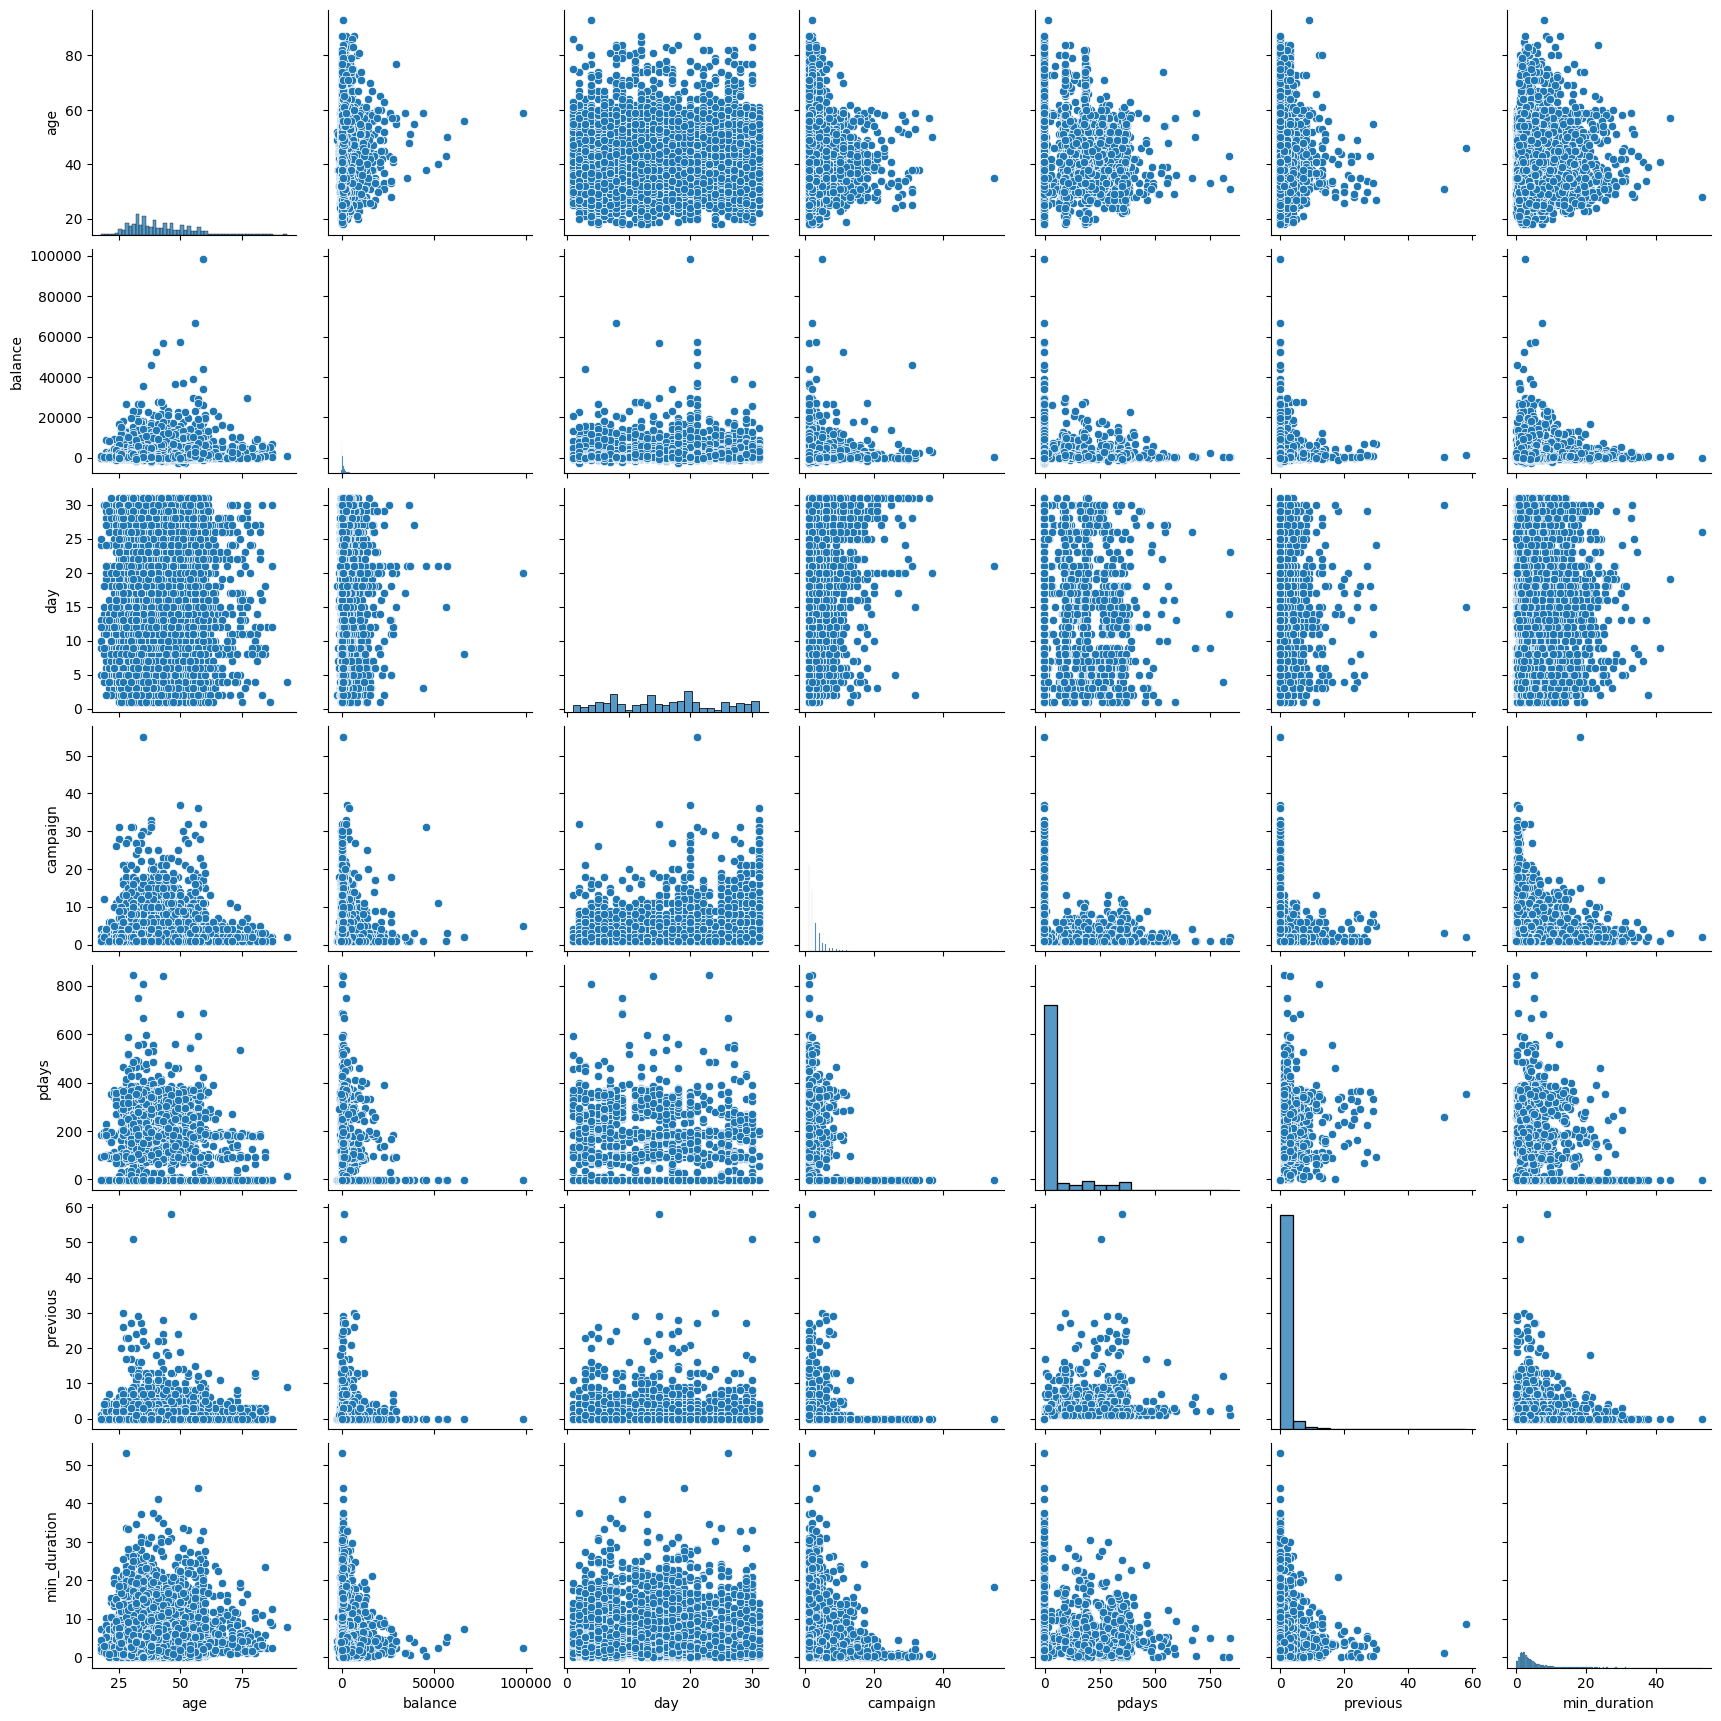

In [13]:
sns.pairplot(df)

In [14]:
df["y"] = df["y"].map({"no":0 , "yes":1}) # paso a 1 y 0 el target para tratarlo como numérica

<Axes: xlabel='y', ylabel='age'>

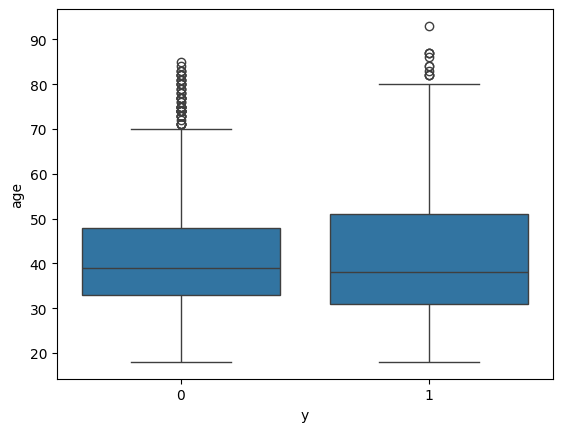

In [15]:
# Donde suelen decir que SI según la edad
sns.boxplot(data=df, x="y", y = "age")

Text(0.5, 0, 'Rango de edad')

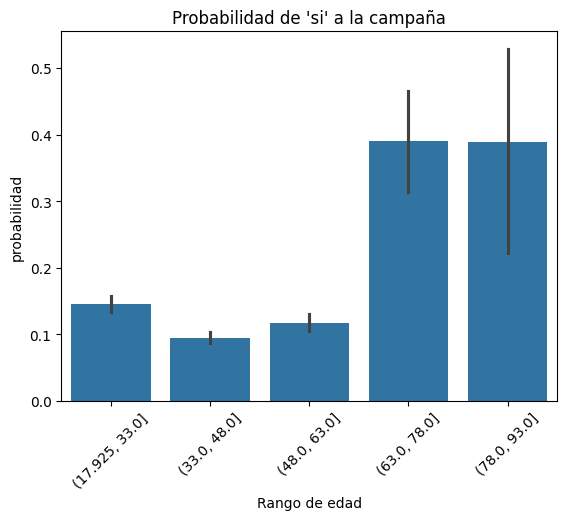

In [16]:
# Se ve cual es la probabilidad de que según tu edad te digan que si a la campaña

df["age_bin"] = pd.cut(df["age"], bins=5)

sns.barplot(x="age_bin", y="y", data=df)
plt.xticks(rotation=45)
plt.title("Probabilidad de 'si' a la campaña")
plt.ylabel("probabilidad")
plt.xlabel("Rango de edad")

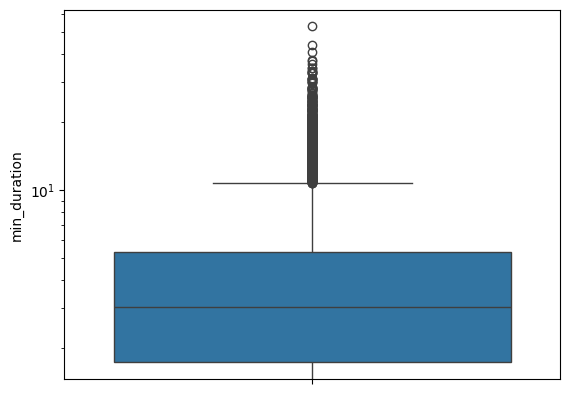

In [17]:
sns.boxplot(df["min_duration"])
plt.yscale("log")

In [18]:
df["education"].value_counts()

education
secondary    5022
tertiary     3047
primary      1520
unknown       411
Name: count, dtype: int64

In [19]:
df.groupby("education")["y"].mean()

education
primary      0.086842
secondary    0.106930
tertiary     0.154250
unknown      0.163017
Name: y, dtype: float64

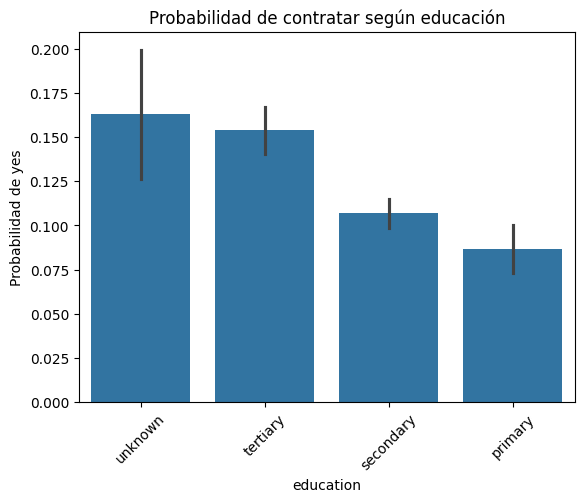

In [20]:
edu_order = df.groupby("education")["y"].mean().sort_values(ascending=False).index

sns.barplot(x="education", y="y", data=df,order=edu_order)
plt.xticks(rotation=45)
plt.ylabel("Probabilidad de yes")
plt.title("Probabilidad de contratar según educación")
plt.show()


In [21]:
df["pdays_contacted"] = (df["pdays"] != -1).astype(int)
# pdays_real = solo los que fueron contactados
df["pdays"] = df["pdays"].replace(-1, 0)

# Esto se hace pq el -1 tiene el significado de que no se ha contactado con él

In [22]:
#df = df.drop(columns="pdays_real")

In [46]:
def preparar_datos(df):
    df = df.copy()
    df["min_duration"] = df["duration"] / 60
    df = df.drop(columns="duration")
    df["pdays_contacted"] = (df["pdays"] != -1).astype(int)
    df["y"] = df["y"].map({"no": 0, "yes": 1})
    return df


In [ ]:
df.to_csv("data/processed/bank_processed.csv") #archivo ya limpiopara trabajar

<h3>2. Preparar Train y Test

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [24]:
X = df.drop(columns="y", axis=1)
y=df["y"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train.to_csv("data/train/X_train.csv",index=False)
y_train.to_csv("data/train/y_train.csv",index=False)
X_test.to_csv("data/test/X_test.csv",index=False)         #Envio las divisiones a cada carpeta correspondiente
y_test.to_csv("data/test/y_test.csv",index=False)

In [25]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,min_duration,age_bin,pdays_contacted
3776,40,blue-collar,married,secondary,no,580,yes,no,unknown,16,may,1,0,0,unknown,0,3.200000,"(33.0, 48.0]",0
9928,47,services,single,secondary,no,3644,no,no,unknown,9,jun,2,0,0,unknown,0,1.383333,"(33.0, 48.0]",0


<h3> 3. Preparamos el Baseline model

In [26]:
# 1. primer paso: separar categóricas y numéricas

categoricas = [ 'job', 'marital', 'education', 'default', 'housing','loan', "poutcome","pdays_contacted"]

numerics = ['age', 'campaign', 'pdays', 'previous']
      


In [27]:
# 2. segundo paso : Columns Transformers

preprocessor = ColumnTransformer([
    
    ("num", StandardScaler(), numerics),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categoricas)
])

<h3>1. Logistic Regression

In [28]:
# 3. tercer paso: Seleccionamos el modelo 

pipeline_lr = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42))
])

In [29]:
# 4. cuarto paso: creaos los parametros y el GridSearchGV

param_grid = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l2"],  
    "model__solver": ["lbfgs"] 
}

grid_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid,
    cv=5,                 
    scoring="roc_auc",    # para datos desbalanceados 
    n_jobs=-1
)

# Entrenar solo con X_train / y_train
grid_lr.fit(X_train, y_train)

# Mejor modelo y parámetros
best_pipeline = grid_lr.best_estimator_
print("Mejores parámetros:", grid_lr.best_params_)

Mejores parámetros: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


In [30]:
y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.6765
F1-score: 0.33504624871531347
Precision: 0.22544951590594745
Recall: 0.652
ROC-AUC: 0.7144194285714285


<h3>2. Random Forest Classifier

In [31]:
from sklearn.metrics import precision_recall_curve, auc

In [32]:
pipeline_rfc = Pipeline([
    ("preprocess",preprocessor),
    ("model", RandomForestClassifier(class_weight="balanced",random_state=42))
])

param_grid2 = {
    "model__n_estimators": [200,300,400],
    "model__max_depth":[None,10,15],
    "model__min_samples_split":[2,4],
    "model__min_samples_leaf":[1,2,3],
    "model__class_weight": ["balanced", {0:1, 1:5}]
}

grid_rfc = GridSearchCV(
    estimator=pipeline_rfc,
    param_grid=param_grid2,
    cv=5,                 
    scoring="roc_auc",    # para datos desbalanceados 
    n_jobs=-1
)

grid_rfc.fit(X_train, y_train)

# Mejor modelo y parámetros
best_pipeline2 = grid_rfc.best_estimator_
print("Mejores parámetros:", grid_rfc.best_params_)

Mejores parámetros: {'model__class_weight': {0: 1, 1: 5}, 'model__max_depth': 10, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [33]:

y_proba2 = best_pipeline2.predict_proba(X_test)[:, 1]
threshold = 0.35  # Necesito bajar el umbral ya que mis datos están desbalanceados y por preaución mi modelo dice no cuando es SI.
y_pred_adj = (y_proba2 >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_adj))
print("F1-score:", f1_score(y_test, y_pred_adj))
print("Precision:", precision_score(y_test, y_pred_adj))
print("Recall",recall_score(y_test, y_pred_adj))
print("ROC-AUC:", roc_auc_score(y_test, y_proba2))
print()

Accuracy: 0.7095
F1-score: 0.3691639522258415
Precision: 0.2533532041728763
Recall 0.68
ROC-AUC: 0.7352628571428571



In [34]:


# 1. Extraer el random forest entrenado desde el pipeline
rf = best_pipeline2.named_steps["model"]

# 2. Extraer transformador
pre = best_pipeline2.named_steps["preprocess"]

# Columnas que pasan por cada transformador
cat_cols = categoricas
num_cols = numerics

# 3. Sacar los nombres creados por OneHotEncoder
ohe = pre.named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(cat_cols)

# 4. Crear lista completa de nombres finales
all_features = list(num_cols) + list(ohe_feature_names)

# 5. Importancias del modelo
importances = rf.feature_importances_

# 6. DataFrame ordenado
feat_imp = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values("importance", ascending=False)

print(feat_imp.head(25))


                feature  importance
0                   age    0.142386
31     poutcome_success    0.137905
2                 pdays    0.092829
1              campaign    0.075698
26          housing_yes    0.066074
25           housing_no    0.051791
3              previous    0.034694
32     poutcome_unknown    0.029248
29     poutcome_failure    0.028150
34    pdays_contacted_1    0.027758
33    pdays_contacted_0    0.025072
21   education_tertiary    0.022596
5       job_blue-collar    0.022412
17      marital_married    0.021044
27              loan_no    0.020679
18       marital_single    0.020487
28             loan_yes    0.019624
20  education_secondary    0.016117
12          job_student    0.015619
9           job_retired    0.013404
8        job_management    0.013230
19    education_primary    0.012869
13       job_technician    0.011503
16     marital_divorced    0.010903
30       poutcome_other    0.010504


<h3>3. XGBoost -------------------

In [35]:
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",  # para clasificación binaria
    use_label_encoder=False,
    random_state=42
)

pipeline_gxb = Pipeline([
    ("preproces",preprocessor),
    ("model",xgb)
])

param_grid3 = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [3, 6, 10],
    "model__learning_rate": [0.01, 0.1, 0.2],
    "model__subsample": [0.8, 1],
    "model__colsample_bytree": [0.8, 1],
    "model__scale_pos_weight": [4, 5, 6]  # clase minoritaria ~1/0.12 = 8 → puedes probar 4-6
}

grid_xgb = GridSearchCV(
    estimator=pipeline_gxb,
    param_grid=param_grid3,
    cv=5,                 
    scoring="recall",    # para datos desbalanceados 
    n_jobs=-1
)

grid_xgb.fit(X_train,y_train)

best_pipeline3 = grid_xgb.best_estimator_
print(grid_xgb.best_params_)

c:\Users\Angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:03:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'model__colsample_bytree': 1, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__scale_pos_weight': 6, 'model__subsample': 0.8}


In [36]:

y_proba3 = best_pipeline3.predict_proba(X_test)[:, 1]
threshold = 0.33  
y_pred_adj2 = (y_proba3 >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_adj2))
print("F1-score:", f1_score(y_test, y_pred_adj2))
print("Precision:", precision_score(y_test, y_pred_adj2))
print("Recall",recall_score(y_test, y_pred_adj2))
print("ROC-AUC:", roc_auc_score(y_test, y_proba3))
print()

Accuracy: 0.5025
F1-score: 0.2918149466192171
Precision: 0.1774891774891775
Recall 0.82
ROC-AUC: 0.7395234285714286



<h3>4. Catboost ---------------

In [37]:
from catboost import CatBoostClassifier

In [38]:
pipeline_cat = Pipeline([
    ("preproces",preprocessor),
    ("model",CatBoostClassifier(auto_class_weights="Balanced",verbose=0,random_state=42))
])

param_grid4 = {
   "model__iterations":[300,600],
   "model__depth":[4,6],
   "model__learning_rate":[0.03,0.1]
}

grid_cat = GridSearchCV(
    estimator=pipeline_cat,
    param_grid=param_grid4,
    cv=5,
    scoring="recall",
    n_jobs=-1
)

grid_cat.fit(X_train,y_train)
best_pipeline4 = grid_cat.best_estimator_
print("Mejores params:",grid_cat.best_params_)

Mejores params: {'model__depth': 4, 'model__iterations': 300, 'model__learning_rate': 0.03}


In [39]:
y_proba4 = best_pipeline4.predict_proba(X_test)[:, 1]
threshold = 0.37  
y_pred_adj3 = (y_proba4 >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_adj3))
print("F1-score:", f1_score(y_test, y_pred_adj3))
print("Precision:", precision_score(y_test, y_pred_adj3))
print("Recall",recall_score(y_test, y_pred_adj3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba4))
print()

Accuracy: 0.4815
F1-score: 0.28532046864231564
Precision: 0.1723563696919234
Recall 0.828
ROC-AUC: 0.7366457142857142



<h3>5. Eassy Ensemble Classifier --------------

In [40]:
from imblearn.ensemble import EasyEnsembleClassifier

In [41]:
pipeline_eec = Pipeline([
    ("preproces",preprocessor),
    ("model",EasyEnsembleClassifier(n_estimators=50,random_state=42))
])

param_eec = {
    "model__n_estimators": [30, 50, 70]
    
}


grid_eec = GridSearchCV(
    estimator=pipeline_eec,
    param_grid=param_eec,
    cv=5,
    scoring="recall",
    n_jobs=-1
)

grid_eec.fit(X_train, y_train)

best_pipeline5 = grid_eec.best_estimator_
print("Mejores parámetros:", grid_eec.best_params_)



Mejores parámetros: {'model__n_estimators': 70}


In [42]:
y_proba5 = best_pipeline5.predict_proba(X_test)[:, 1]
threshold = 0.4  
y_pred_adj4 = (y_proba5 >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_adj4))
print("F1-score:", f1_score(y_test, y_pred_adj4))
print("Precision:", precision_score(y_test, y_pred_adj4))
print("Recall",recall_score(y_test, y_pred_adj4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba5))

Accuracy: 0.2125
F1-score: 0.23133235724743778
Precision: 0.13173985547526404
Recall 0.948
ROC-AUC: 0.7189257142857142


----------------

<h2> Modelo no supervisado

<h3>6. Kmeans

In [43]:
from sklearn.cluster import KMeans

In [44]:


pipeline_kms = Pipeline([
    ("procesor",preprocessor),
    ("model",KMeans(n_clusters=2,random_state=42))
])

pipeline_kms.fit(X_train)

clusters = pipeline_kms.named_steps['model'].labels_

# Añadir los clusters al dataset para análisis
X_train_clusters = X_train.copy()
X_train_clusters['cluster'] = clusters

# Mostrar cuántos puntos hay en cada cluster
print(X_train_clusters['cluster'].value_counts())


cluster
0    6547
1    1453
Name: count, dtype: int64


In [45]:
pd.crosstab(X_train_clusters['cluster'], y_train)

y,0,1
cluster,,
0,5922,625
1,1122,331
